# 1 - Libraries

In [16]:
%load_ext autoreload
%autoreload 2

import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 100)

sys.path.append('./../')
import config
from utils import tools
from data_analysis import analysis_plotter, analysis_utils, reporter, dos_plotter
from data_handling import data_processing


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tabulate import tabulate
from autogluon.tabular import TabularDataset, TabularPredictor
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Data

In [2]:
MaterialsProcessor = data_processing.DataProcessor(config.PATH_TEST_FIGURES)
materials_data, supercon_data = MaterialsProcessor.processor()
materials_data.head()

2024-06-25 20:22:05: · MODULE: DataProcessor...
2024-06-25 20:22:18:   - 1 rows (0.0017 %) where dropped because of null on ICSD.


bravais_lattice material_name    ICSD  fermi_energy  is_magnetic  \
0             BCC      Ag1F6Sb1   28676      -2.03066        False   
1             BCC      Ag1F6Sb1  411795      -2.03253        False   
2             BCC        Ag1Te3   37186       5.57824        False   
3             BCC     Ag3Au1Se2   15734       2.21332        False   
4             BCC     Ag3Au1Se2  171959       2.22832        False   

   is_superconductor  DOS_m15_00  DOS_m14_98  DOS_m14_97  DOS_m14_95  \
0              False         0.0         0.0         0.0         0.0   
1              False         0.0         0.0         0.0         0.0   
2              False         0.0         0.0         0.0         0.0   
3              False         0.0         0.0         0.0         0.0   
4              False         0.0         0.0         0.0         0.0   

   DOS_m14_94  DOS_m14_92  DOS_m14_91  DOS_m14_89  DOS_m14_88  DOS_m14_86  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_85  DOS_m14_83  DOS_m14_82  DOS_m14_80  DOS_m14_79  DOS_m14_77  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_76  DOS_m14_74  DOS_m14_73  DOS_m14_71  DOS_m14_70  DOS_m14_68  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_67  DOS_m14_65  DOS_m14_64  DOS_m14_62  DOS_m14_61  DOS_m14_59  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_58  DOS_m14_56  DOS_m14_55  DOS_m14_53  DOS_m14_52  DOS_m14_50  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_49  DOS_m14_47  DOS_m14_46  DOS_m14_44  DOS_m14_43  DOS_m14_41  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_40  DOS_m14_38  DOS_m14_37  DOS_m14_35  DOS_m14_34  DOS_m14_32  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0 

# 3. Preprocessing

In [8]:
path_final = r'.\..\results\test_final' 

In [4]:
data = materials_data.copy()
data.dropna(inplace=True)
data['is_superconductor'] = data['is_superconductor'].astype(bool)

dos_cols = data.loc[:, 'DOS_m15_00':'DOS_p15_00'].columns.tolist()
categorical_cols = ['bravais_lattice']
target_col = ['is_superconductor']

## Autogluon con dato 'crudo'

In [10]:
X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['fermi_energy', 'is_magnetic'] + dos_cols)  
    ]
)
        
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

train_data = pd.concat([pd.DataFrame(X_train).reset_index(drop=True), pd.DataFrame(y_train).reset_index(drop=True)], axis=1)
test_data = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

predictor = TabularPredictor(label='is_superconductor', 
                             problem_type='binary', 
                             eval_metric='f1', 
                             path=os.path.join(path_final, 'autogluon_raw', 'Autogluon')
                             ).fit(
                                 TabularDataset(train_data),
                                 presets='medium_quality'
                                 )
performance = predictor.evaluate(TabularDataset(test_data))
leaderboard = predictor.leaderboard(TabularDataset(test_data), extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to ".\..\results\test_final\autogluon_raw"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          24
Memory Avail:       12.71 GB / 31.81 GB (40.0%)
Disk Space Avail:   449.78 GB / 931.38 GB (48.3%)
Train Data Rows:    48172
Train Data Columns: 2015
Label Column:       is_superconductor
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    13

[1000]	valid_set's binary_logloss: 0.153349	valid_set's f1: 0.593472


	0.6289	 = Validation score   (f1)
	62.79s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.160214	valid_set's f1: 0.593023


	0.5971	 = Validation score   (f1)
	60.24s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.5851	 = Validation score   (f1)
	48.28s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.5875	 = Validation score   (f1)
	41.42s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesGini ...
	0.5824	 = Validation score   (f1)
	7.54s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.5924	 = Validation score   (f1)
	7.33s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		Failed to load PyTorch C extensions:
    It appears that PyTorch has loaded the `torch/_C` folder
    of the PyTorch repository rather than the C extensions which
    are expected in the `torch._C` namespace. This can occur when
    using the `install` workflow. e.g.
        $ python setup.py install && python -c "import t

In [17]:
leaderboard_df = pd.DataFrame(leaderboard)
leaderboard_df.to_csv(os.path.join(path_final, 'autogluon_raw', 'leaderboard.csv'), index=False)
with open(os.path.join(path_final, 'autogluon_raw', 'report.txt'), 'w') as f:
    f.write(f'Performance:\n{performance}')

leaderboard

,model,score_test,accuracy,roc_auc,precision,recall,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.607211,0.948439,0.944582,0.768000,0.502092,0.628895,f1,0.198806,0.045526,62.790186,0.198806,0.045526,62.790186,1,True,3
1,WeightedEnsemble_L2,0.607211,0.948439,0.944582,0.768000,0.502092,0.628895,f1,0.201306,0.047026,63.043919,0.002500,0.001500,0.253733,2,True,11
2,LightGBM,0.598214,0.947692,0.942161,0.766340,0.490586,0.597101,f1,0.203279,0.049642,60.237896,0.203279,0.049642,60.237896,1,True,4
3,LightGBMLarge,0.595527,0.947443,0.944748,0.765189,0.487448,0.612245,f1,0.175145,0.049613,66.553304,0.175145,0.049613,66.553304,1,True,10
4,XGBoost,0.584576,0.946778,0.938747,0.768313,0.471757,0.605341,f1,0.713218,0.147273,127.501212,0.713218,0.147273,127.501212,1,True,9
5,ExtraTreesGini,0.575032,0.944039,0.918897,0.723810,0.476987,0.582353,f1,0.281381,0.070143,7.535776,0.281381,0.070143,7.535776,1,True,7
6,ExtraTreesEntr,0.574481,0.943789,0.923248,0.719685,0.478033,0.592375,f1,0.247290,0.071704,7.334228,0.247290,0.071704,7.334228,1,True,8
7,RandomForestEntr,0.570347,0.943457,0.924635,0.718601,0.472803,0.587537,f1,0.233251,0.065557,41.417081,0.233251,0.065557,41.417081,1,True,6
8,RandomForestGini,0.567602,0.943706,0.915982,0.727124,0.465481,0.585075,f1,0.280303,0.066550,48.284939,0.280303,0.066550,48.284939,1,True,5
9,KNeighborsDist,0.467011,0.922866,0.808160,0.517154,0.425732,0.476190,f1,4.959379,1.083987,1.894165,4.959379,1.083987,1.894165,1,True,2


## Autogluon con para diferentes remuestreos

In [19]:
X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['fermi_energy', 'is_magnetic'] + dos_cols)  
    ]
)
        
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

test_data = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

# Undersampling con RandomOverSampler
rus = RandomUnderSampler()
X_under_resampled, y_under_resampled = rus.fit_resample(X_train, y_train)
train_data_undersampled = pd.concat([pd.DataFrame(X_under_resampled).reset_index(drop=True), pd.DataFrame(y_under_resampled).reset_index(drop=True)], axis=1)
predictor_undersampled = TabularPredictor(label='is_superconductor', 
                                          problem_type='binary', 
                                          eval_metric='f1', 
                                          path = os.path.join(path_final, 'resampling', 'RandomUnderSampler')
                                          ).fit(
                                              TabularDataset(train_data_undersampled),
                                              presets='medium_quality'
                                              )
leaderboard_undersampled = predictor_undersampled.leaderboard(TabularDataset(test_data), extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

# Oversampling con RandomOverSampler
ros = RandomOverSampler()  
X_over_resampled, y_over_resampled = ros.fit_resample(X_train, y_train)
train_data_oversampled = pd.concat([pd.DataFrame(X_over_resampled).reset_index(drop=True), pd.DataFrame(y_over_resampled).reset_index(drop=True)], axis=1)
predictor_oversampled = TabularPredictor(label='is_superconductor', 
                                         problem_type='binary', 
                                         eval_metric='f1', 
                                         path=os.path.join(path_final, 'resampling', 'RandomOverSampler')
                                         ).fit(
                                            TabularDataset(train_data_oversampled),
                                            presets='medium_quality'
                                            )
leaderboard_oversampled = predictor_oversampled.leaderboard(TabularDataset(test_data), extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

# Oversampling con SMOTE
smote = SMOTE()
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train, y_train)
train_data_smote = pd.concat([pd.DataFrame(X_smote_resampled).reset_index(drop=True), pd.DataFrame(y_smote_resampled).reset_index(drop=True)], axis=1)
predictor_smote = TabularPredictor(label='is_superconductor', 
                                   problem_type='binary', 
                                   eval_metric='f1', 
                                   path=os.path.join(path_final, 'resampling', 'SMOTE')
                                   ).fit(
                                       TabularDataset(train_data_smote),
                                       presets='medium_quality'
                                       )
leaderboard_smote = predictor_smote.leaderboard(TabularDataset(test_data), extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to ".\..\results\test_final\resampling\RandomUnderSampler"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          24
Memory Avail:       14.53 GB / 31.81 GB (45.7%)
Disk Space Avail:   449.12 GB / 931.38 GB (48.2%)
Train Data Rows:    7926
Train Data Columns: 2015
Label Column:       is_superconductor
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:       

[1000]	valid_set's binary_logloss: 0.122858	valid_set's f1: 0.967467
[2000]	valid_set's binary_logloss: 0.0785389	valid_set's f1: 0.978074
[3000]	valid_set's binary_logloss: 0.0615031	valid_set's f1: 0.983078
[4000]	valid_set's binary_logloss: 0.0555988	valid_set's f1: 0.985416


	0.9854	 = Validation score   (f1)
	228.02s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.0905475	valid_set's f1: 0.975781
[2000]	valid_set's binary_logloss: 0.0540059	valid_set's f1: 0.985028
[3000]	valid_set's binary_logloss: 0.0452725	valid_set's f1: 0.986582
[4000]	valid_set's binary_logloss: 0.0452073	valid_set's f1: 0.988142
[5000]	valid_set's binary_logloss: 0.047851	valid_set's f1: 0.988924


	0.9893	 = Validation score   (f1)
	317.54s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9897	 = Validation score   (f1)
	70.19s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9889	 = Validation score   (f1)
	61.67s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
	To avoid this warning, specify the model hyperparameter "ag.max_memory_usage_ratio" to a larger value (currently 1.0, set to >=1.06 to avoid the warning)
		To set the same value for all models, do the following when calling predictor.fit: `predictor.fit(..., ag_args_fit={"ag.max_memory_usage_ratio": VALUE})`
		Setting "ag.max_memory_usage_ratio" to values above 1 may result in out-of-memory errors. You may consider using a machine with more memory as a safer alternative.
		
Fitting model: ExtraTreesGini ...
	0.9893	 = Validation score   (f1)
	17.18s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting m

[1000]	valid_set's binary_logloss: 0.0465318	valid_set's f1: 0.986193
[2000]	valid_set's binary_logloss: 0.0475062	valid_set's f1: 0.987362


	0.9885	 = Validation score   (f1)
	326.13s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'RandomForestGini': 0.75, 'LightGBM': 0.25}
	0.9905	 = Validation score   (f1)
	0.19s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1089.31s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load(".\..\results\test_final\resampling\RandomOverSampler")
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to ".\..\results\test_final\resampling\SMOTE"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Windows
Platfo

[1000]	valid_set's binary_logloss: 0.0949977	valid_set's f1: 0.968304
[2000]	valid_set's binary_logloss: 0.0734983	valid_set's f1: 0.97499
[3000]	valid_set's binary_logloss: 0.0676324	valid_set's f1: 0.978114


	0.9781	 = Validation score   (f1)
	181.22s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.0858509	valid_set's f1: 0.972112
[2000]	valid_set's binary_logloss: 0.0751395	valid_set's f1: 0.976874
[3000]	valid_set's binary_logloss: 0.0784709	valid_set's f1: 0.977264


	0.9784	 = Validation score   (f1)
	183.2s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.97	 = Validation score   (f1)
	177.76s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9684	 = Validation score   (f1)
	120.05s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesGini ...
	0.9708	 = Validation score   (f1)
	19.17s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9681	 = Validation score   (f1)
	17.66s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	To force training the model, specify the model hyperparameter "ag.max_memory_usage_ratio" to a larger value (currently 1.0, set to >=1.33 to avoid the error)
		To set the same value for all models, do the following when calling predictor.fit: `predictor.fit(..., ag_args_fit={"ag.max_memory_usage_ratio": VALUE})`
		Setting

In [37]:
performance_undersampled = predictor_undersampled.evaluate(TabularDataset(test_data))
leaderboard_undersampled_df = pd.DataFrame(leaderboard_undersampled)
leaderboard_undersampled_df.to_csv(os.path.join(path_final, 'resampling', 'RandomUnderSampler', 'leaderboard.csv'), index=False)
undersampled_path = os.path.join(path_final, 'resampling', 'report_undersampled.txt')
with open(undersampled_path, 'w') as f:
    f.write(f"Rendimiento: {performance_undersampled}\n")
    f.write("\nLeaderboard:\n")
    f.write(str(leaderboard_undersampled))

performance_oversampled = predictor_oversampled.evaluate(TabularDataset(test_data))
leaderboard_oversampled_df = pd.DataFrame(leaderboard_oversampled)
leaderboard_oversampled_df.to_csv(os.path.join(path_final, 'resampling', 'RandomOverSampler', 'leaderboard.csv'), index=False)
oversampled_path = os.path.join(path_final, 'resampling', 'report_oversampled.txt')
with open(oversampled_path, 'w') as f:
    f.write(f"Rendimiento: {performance_oversampled}\n")
    f.write("\nLeaderboard:\n")
    f.write(str(leaderboard_oversampled))

performance_smote = predictor_smote.evaluate(TabularDataset(test_data))
leaderboard_smote_df = pd.DataFrame(leaderboard_smote)
leaderboard_smote_df.to_csv(os.path.join(path_final, 'resampling', 'SMOTE', 'leaderboard.csv'), index=False)
smote_path = os.path.join(path_final, 'resampling', 'report_smote.txt')
with open(smote_path, 'w') as f:
    f.write(f"Rendimiento: {performance_smote}\n")
    f.write("\nLeaderboard:\n")
    f.write(str(leaderboard_smote))

In [21]:
leaderboard_undersampled_df

,model,score_test,accuracy,roc_auc,precision,recall,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.429577,0.811690,0.928167,0.282781,0.893305,0.857485,f1,0.189548,0.022652,59.508945,0.189548,0.022652,59.508945,1,True,10
1,LightGBMXT,0.427300,0.807705,0.929471,0.279793,0.903766,0.857820,f1,0.186700,0.025566,17.212204,0.186700,0.025566,17.212204,1,True,3
2,XGBoost,0.412866,0.796911,0.920475,0.267913,0.899582,0.867215,f1,0.701045,0.057775,37.949141,0.701045,0.057775,37.949141,1,True,9
3,WeightedEnsemble_L2,0.412866,0.796911,0.920475,0.267913,0.899582,0.867215,f1,0.712062,0.058775,38.156830,0.011018,0.001000,0.207688,2,True,11
4,ExtraTreesGini,0.412302,0.796911,0.923245,0.267623,0.897490,0.844603,f1,0.215395,0.048008,1.410084,0.215395,0.048008,1.410084,1,True,7
5,ExtraTreesEntr,0.408115,0.794088,0.924344,0.264378,0.894351,0.845336,f1,0.207252,0.047032,1.445926,0.207252,0.047032,1.445926,1,True,8
6,RandomForestGini,0.405783,0.791847,0.919979,0.262335,0.895397,0.848921,f1,0.210137,0.047855,8.707687,0.210137,0.047855,8.707687,1,True,5
7,LightGBM,0.403460,0.788110,0.919370,0.259783,0.902720,0.858810,f1,0.172490,0.019509,13.784238,0.172490,0.019509,13.784238,1,True,4
8,RandomForestEntr,0.395804,0.784789,0.921041,0.254649,0.888075,0.847981,f1,0.194149,0.045010,8.445877,0.194149,0.045010,8.445877,1,True,6
9,KNeighborsDist,0.270541,0.637330,0.813407,0.160970,0.847280,0.757750,f1,0.884729,0.120002,0.463553,0.884729,0.120002,0.463553,1,True,2


In [22]:
leaderboard_oversampled_df

,model,score_test,accuracy,roc_auc,precision,recall,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.646348,0.944122,0.943267,0.649419,0.643305,0.985416,f1,0.330964,0.078323,228.021004,0.330964,0.078323,228.021004,1,True,1
1,LightGBMLarge,0.628995,0.946031,0.941729,0.692211,0.576360,0.988533,f1,0.326786,0.069392,326.130167,0.326786,0.069392,326.130167,1,True,7
2,LightGBM,0.627762,0.945450,0.936610,0.684796,0.579498,0.989315,f1,0.339002,0.086150,317.543782,0.339002,0.086150,317.543782,1,True,2
3,WeightedEnsemble_L2,0.625500,0.945616,0.929493,0.689786,0.572176,0.990491,f1,0.664203,0.161703,387.926154,0.010007,0.001000,0.189307,2,True,8
4,RandomForestEntr,0.621993,0.945201,0.927910,0.687342,0.567992,0.988924,f1,0.251856,0.071271,61.670439,0.251856,0.071271,61.670439,1,True,4
5,ExtraTreesGini,0.621839,0.945367,0.925731,0.690051,0.565900,0.989315,f1,0.374879,0.069392,17.177029,0.374879,0.069392,17.177029,1,True,5
6,ExtraTreesEntr,0.619540,0.945035,0.926179,0.687500,0.563808,0.988924,f1,0.317249,0.070176,16.354486,0.317249,0.070176,16.354486,1,True,6
7,RandomForestGini,0.619184,0.944952,0.927039,0.686624,0.563808,0.989707,f1,0.315193,0.074553,70.193065,0.315193,0.074553,70.193065,1,True,3


In [23]:
leaderboard_smote_df

,model,score_test,accuracy,roc_auc,precision,recall,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.641634,0.946114,0.932820,0.679532,0.607741,0.980096,f1,2.729887,0.573670,1169.298600,0.012503,0.000999,0.226799,2,True,9
1,LightGBM,0.637424,0.945782,0.942688,0.679290,0.600418,0.978435,f1,0.193679,0.059560,183.202524,0.193679,0.059560,183.202524,1,True,2
2,LightGBMXT,0.635332,0.943955,0.944109,0.656983,0.615063,0.978131,f1,0.222744,0.062543,181.218163,0.222744,0.062543,181.218163,1,True,1
3,XGBoost,0.634529,0.945865,0.938231,0.683575,0.592050,0.977246,f1,0.712623,0.160480,470.014433,0.712623,0.160480,470.014433,1,True,7
4,LightGBMLarge,0.629077,0.944288,0.944326,0.667057,0.595188,0.976911,f1,0.150526,0.043005,125.414917,0.150526,0.043005,125.414917,1,True,8
5,ExtraTreesEntr,0.627470,0.937396,0.917053,0.594569,0.664226,0.968098,f1,0.410867,0.069115,17.656653,0.410867,0.069115,17.656653,1,True,6
6,ExtraTreesGini,0.624938,0.937313,0.915655,0.595080,0.657950,0.970774,f1,0.468166,0.074904,19.171274,0.468166,0.074904,19.171274,1,True,5
7,RandomForestGini,0.619604,0.937811,0.918325,0.602172,0.638075,0.969984,f1,0.370312,0.075353,177.759230,0.370312,0.075353,177.759230,1,True,3
8,RandomForestEntr,0.617383,0.936400,0.920616,0.590822,0.646444,0.968404,f1,0.338992,0.070715,120.049524,0.338992,0.070715,120.049524,1,True,4


## Remuestreos + PCAs

In [ ]:
X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()

n_components_list = [2, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200, 250, 300, 400, 500] 
sampling_methods = [
    ("none", None),
    ("undersampled", RandomUnderSampler()),
    ("oversampled", RandomOverSampler()),
    ("Smote", SMOTE())
]

for n in n_components_list:
    for sampling_method_name, sampler in sampling_methods:
        print('')
        print('--------------------------------------------------------------------------------------')
        print(f"n: {n}, muestreo: {sampling_method_name}\n")

        # PCA
        pca = PCA(n_components=n)
        pca_columns = [f'PC{i+1}' for i in range(n)]
        X_pca_1 = pca.fit_transform(X[dos_cols]) 
        X_pca_2 = pd.DataFrame(X_pca_1, columns=pca_columns)
        X_pca = pd.concat([X.loc[:, :'is_magnetic'].reset_index(drop=True), X_pca_2.reset_index(drop=True)], axis=1)

        # Prepocess
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', categorical_transformer, categorical_cols),
                ('num', numerical_transformer, ['fermi_energy', 'is_magnetic'] + pca_columns)  
            ]
        )
        X_preprocessed = preprocessor.fit_transform(X_pca)
        if not isinstance(X_preprocessed, np.ndarray):
            X_preprocessed = X_preprocessed.toarray()
        X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())
        
        # Divide train y test
        X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

        # Sampling
        if sampler != None:
            X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)
        else:
            X_train_sampled, y_train_sampled = X_train, y_train

        # Tabular Train y Test
        train_data = pd.concat([pd.DataFrame(X_train_sampled).reset_index(drop=True), pd.DataFrame(y_train_sampled).reset_index(drop=True)], axis=1)
        test_data = pd.concat([pd.DataFrame(X_test).reset_index(drop=True), pd.DataFrame(y_test).reset_index(drop=True)], axis=1)

        # AutoGluon training and evaluation
        print('')
        print('AUTOGLUON:')
        predictor_smote = TabularPredictor(label='is_superconductor',
                                           problem_type='binary', 
                                           eval_metric='f1', 
                                           path=os.path.join(path_final, 'resampling_PCA', 'Autogluon', f'{sampling_method_name}_{n}')
                                           ).fit(
                                               TabularDataset(train_data),
                                               presets='medium_quality'
                                               )
        performance = predictor.evaluate(TabularDataset(test_data))
        leaderboard = predictor.leaderboard(TabularDataset(test_data), extra_metrics=['accuracy', 'roc_auc', 'precision', 'recall'], silent=True)

        print('')
        print(f"n: {n}, muestreo: {sampling_method_name}, rendimiento: {performance}")

        leaderboard_undersampled_df = pd.DataFrame(leaderboard_undersampled)
        leaderboard_undersampled_df.to_csv(os.path.join(path_final, 'resampling_PCA', f'leaderboard_{sampling_method_name}_{n}.csv'), index=False)

        leaderboard_filename = f'leaderboard_{sampling_method_name}_{n}.txt'
        leaderboard_path = os.path.join(path_final, 'resampling_PCA', leaderboard_filename)
        with open(leaderboard_path, 'w') as f:
            f.write(f"n: {n}, muestreo: {sampling_method_name}\n")
            f.write(f"Rendimiento: {performance}\n")
            f.write("\nLeaderboard:\n")
            f.write(str(leaderboard))

## RandomOverSampler + PCA = 10

In [27]:
X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

n_PCA = 10
pca_columns = [f'PC{i+1}' for i in range(n_PCA)]
sampling_method = RandomOverSampler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['fermi_energy', 'is_magnetic'] + pca_columns)  
    ]
)
         
# PCA
pca = PCA(n_components=n_PCA)
X_pca_1 = pca.fit_transform(X[dos_cols]) 
X_pca_2 = pd.DataFrame(X_pca_1, columns=pca_columns)
X_pca = pd.concat([X.loc[:, :'is_magnetic'].reset_index(drop=True), X_pca_2.reset_index(drop=True)], axis=1)

# Preprocessor
X_preprocessed = preprocessor.fit_transform(X_pca)
if not isinstance(X_preprocessed, np.ndarray):
    X_preprocessed = X_preprocessed.toarray()
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Sampling
X_train_sampled, y_train_sampled = sampling_method.fit_resample(X_train, y_train)

# Validación
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)

### - Análisis correlaciones

In [32]:
data_corr = pd.concat([pd.DataFrame(X_train_sampled).reset_index(drop=True), pd.DataFrame(y_train_sampled).reset_index(drop=True)], axis=1)
data_corr['is_superconductor'] = data_corr['is_superconductor'].astype(int)

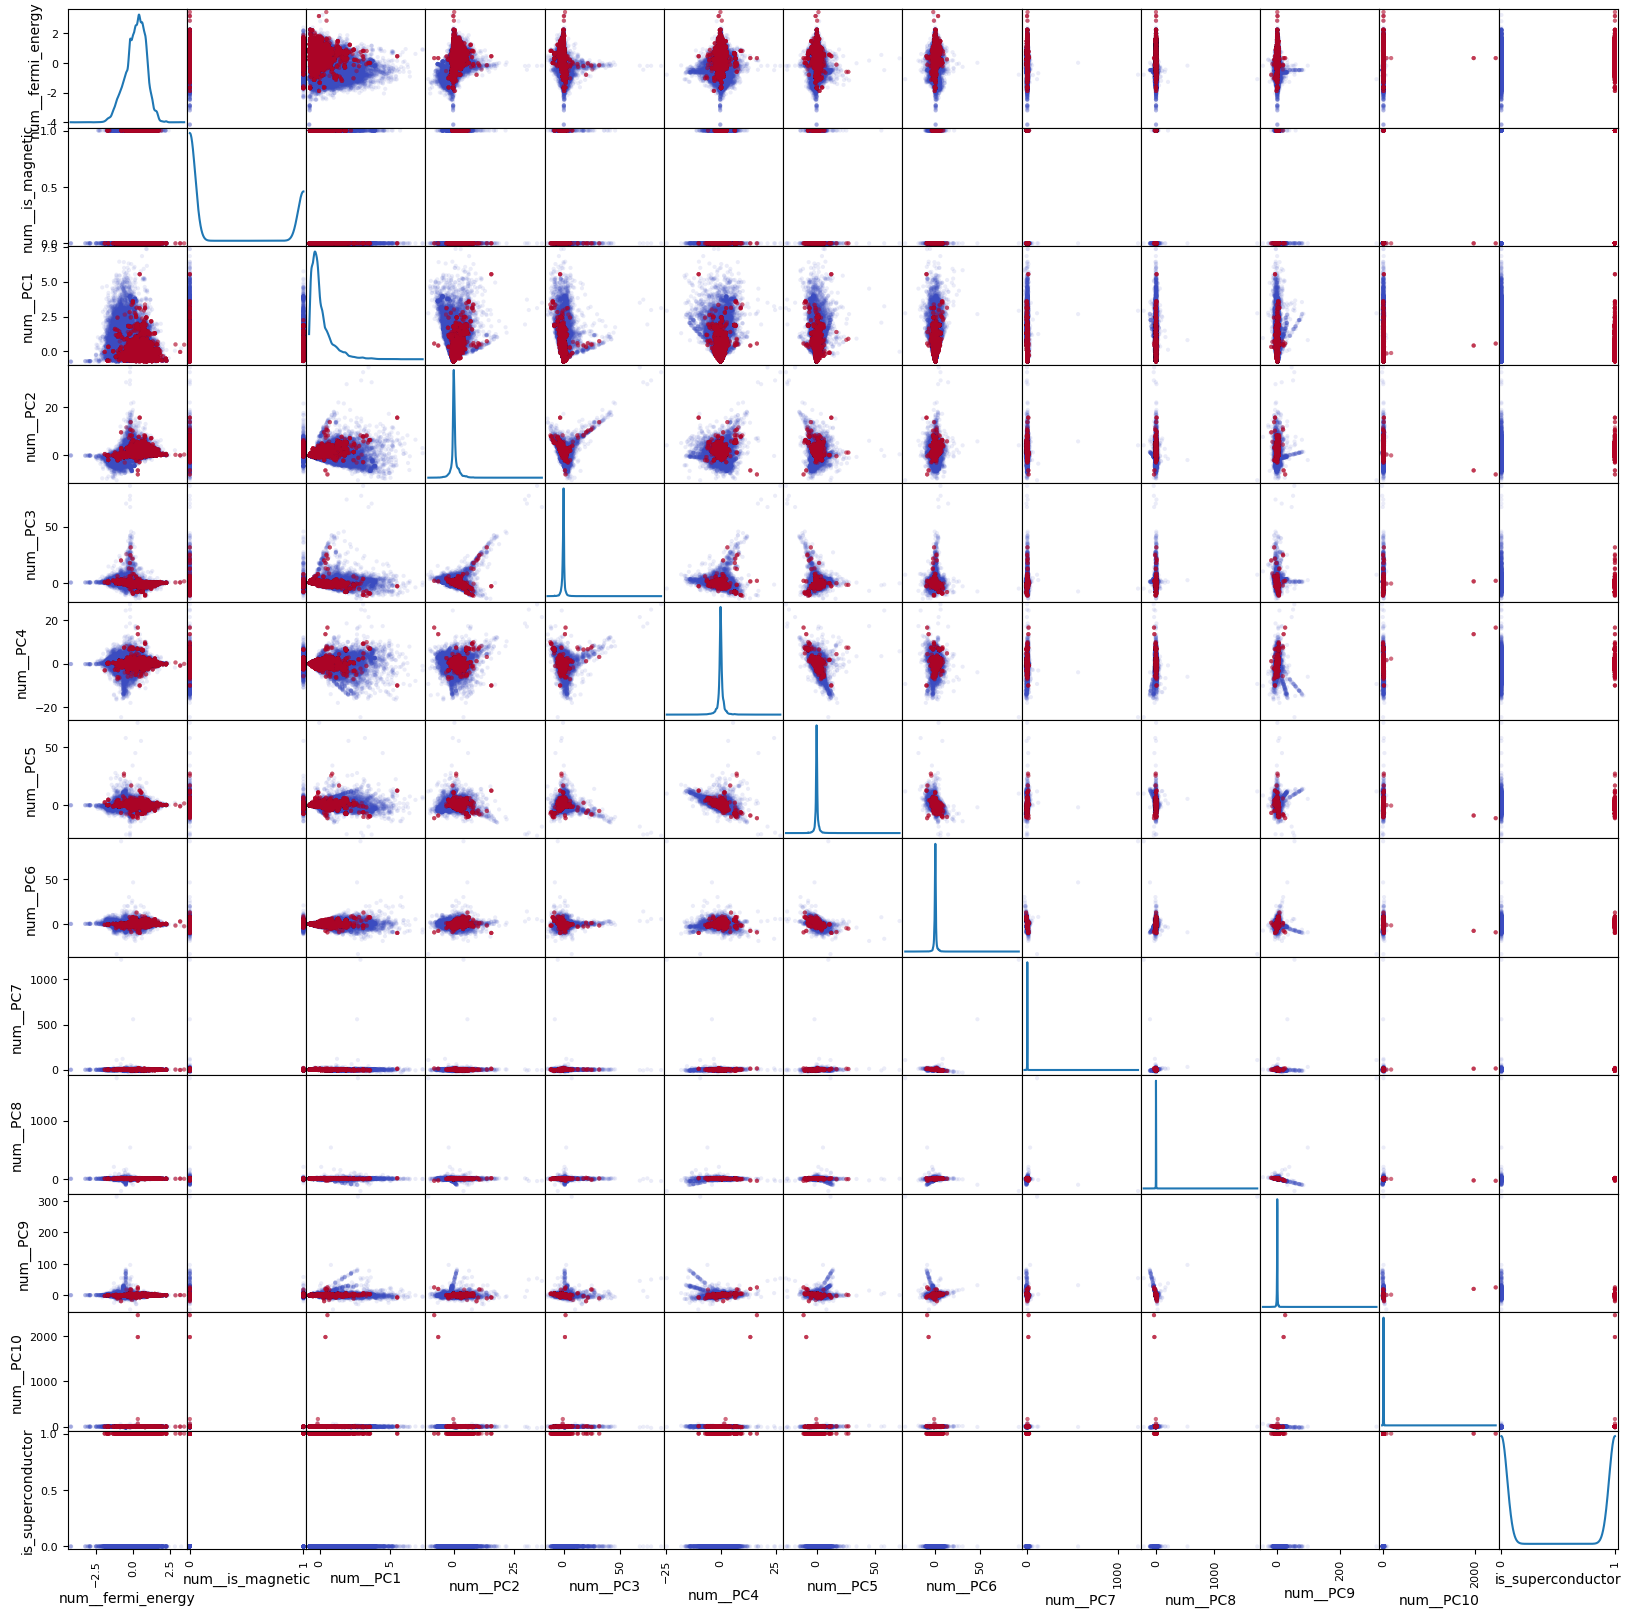

In [40]:
# Scatter matrix
pd.plotting.scatter_matrix(data_corr.loc[:, 'num__fermi_energy':], 
                          alpha=0.1, 
                          figsize=(20,20),
                          diagonal='kde', 
                          c=data_corr['is_superconductor'], 
                          cmap='coolwarm')
plt.show()

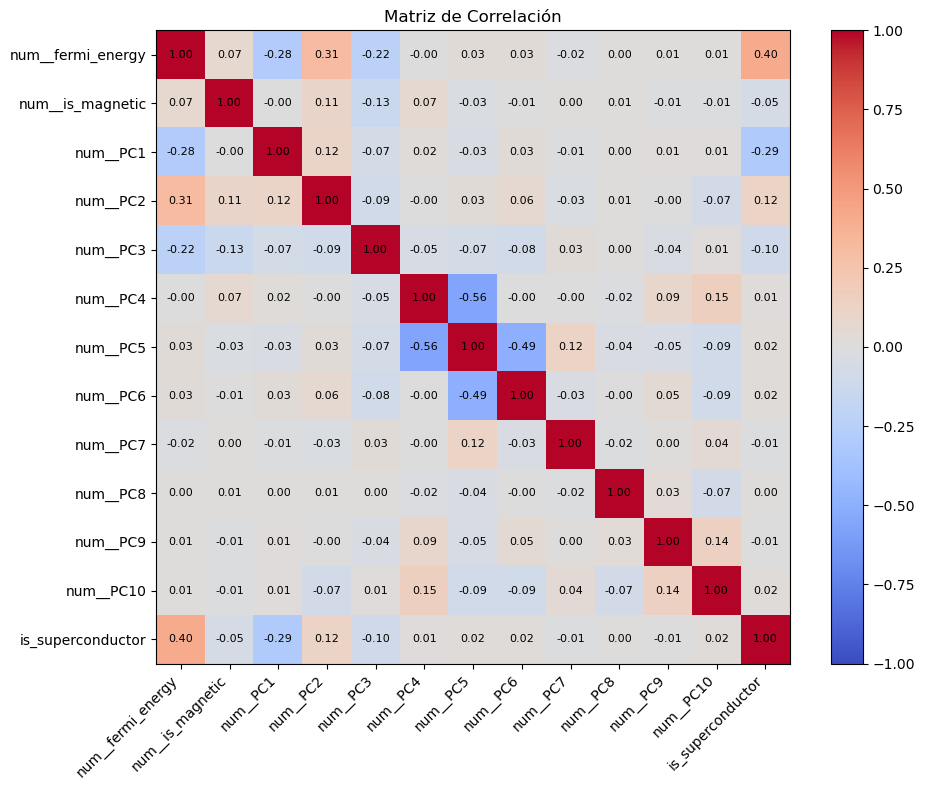

In [35]:
correlation_matrix = data_corr.loc[:, 'num__fermi_energy':].corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", size=8)

ax.set_title('Matriz de Correlación')
fig.tight_layout()
plt.show()

### - Búsqueda hiperparámetros

In [48]:
def run_search(model_class, name, search_space):
    search_method = BayesSearchCV(
        estimator=model_class(),
        search_spaces=search_space,
        n_jobs=-1,
        cv=5,
        n_iter=n_iter,
        scoring='f1',
        refit=True,
        verbose=4
    )

    print(f"\n--- {name} ---")
    search_method.fit(
        X_train_sampled, y_train_sampled
    )

    return search_method

n_iter = 100

search_space = {
    'learning_rate': Real(0.01, 0.5),  # Learning rate
    'max_depth': Integer(3, 10),       # Maximum tree depth
    'n_estimators': Integer(100, 500),  # Number of trees
    'subsample': Real(0.5, 1),         # Subsample ratio of training instances
    'colsample_bytree': Real(0.5, 1),  # Subsample ratio of columns
    'gamma': Real(0, 1),              # Minimum loss reduction required to make a split (solo para XGBoost)
    'reg_alpha': Real(0, 1),           # L1 regularization
    'reg_lambda': Real(0, 1)          # L2 regularization
}

bayes_search_lgbm = run_search(LGBMClassifier, 'BayesSearchCV (LightGBM)', search_space)
random_search_lgbm = run_search(LGBMClassifier, 'RandomizedSearchCV (LightGBM)', search_space)

bayes_search_xgb = run_search(XGBClassifier, 'BayesSearchCV (XGBoost)', search_space)
random_search_xgb = run_search(XGBClassifier, 'RandomizedSearchCV (XGBoost)', search_space)

# Evaluamos los mejores modelos para cada algoritmo
for search_method, name in [(bayes_search_lgbm, 'BayesSearchCV (LightGBM)'), 
                            (random_search_lgbm, 'RandomizedSearchCV (LightGBM)'),
                            (bayes_search_xgb, 'BayesSearchCV (XGBoost)'),
                            (random_search_xgb, 'RandomizedSearchCV (XGBoost)')]:
    best_model = search_method.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    print(f"Mejores hiperparámetros: {search_method.best_params_}\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Matriz de confusión:\n{confusion_matrix_result}\n")

    with open(os.path.join(path_final, 'over_10', 'hiper_search.txt'), 'a') as file:
        file.write(f"\n--- {name} ---\n")
        file.write(f"Mejores hiperparámetros: {search_method.best_params_}\n")
        file.write(f"Accuracy: {accuracy:.4f}\n")
        file.write(f"Precision: {precision:.4f}\n")
        file.write(f"Recall: {recall:.4f}\n")
        file.write(f"F1-score: {f1:.4f}\n")
        file.write(f"AUC: {auc:.4f}\n")
        file.write(f"Matriz de confusión:\n{confusion_matrix_result}\n")


--- BayesSearchCV (LightGBM) ---
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for ea

### - Búsqueda hiperparámetros + Tratamiento outliers

Busqueda mas extensa -> Early Stopping

In [49]:
X = data.drop(target_col, axis=1)
X = X.fillna(0) 
y = data[target_col]
y = y.iloc[:, 0]

n_PCA = 10
pca_columns = [f'PC{i+1}' for i in range(n_PCA)]
sampling_method = RandomOverSampler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['fermi_energy', 'is_magnetic'] + pca_columns)  
    ]
)
         
# PCA
pca = PCA(n_components=n_PCA)
X_pca_1 = pca.fit_transform(X[dos_cols]) 
X_pca_2 = pd.DataFrame(X_pca_1, columns=pca_columns)
X_pca = pd.concat([X.loc[:, :'is_magnetic'].reset_index(drop=True), X_pca_2.reset_index(drop=True)], axis=1)

def remove_outliers_iqr(data, y, column):
    data = data.reset_index(drop=True)
    y = y.reset_index(drop=True)
    Q1 = data[column].quantile(0.1)
    Q3 = data[column].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = ~((data[column] < lower_bound) | (data[column] > upper_bound))
    data_filtered = data[mask]
    y_filtered = y[mask]
    num_removed = len(data) - len(data_filtered)
    return data_filtered, y_filtered, num_removed
total_removed = 0
for col in ['fermi_energy'] + pca_columns:
    X_pca, y, num_removed = remove_outliers_iqr(X_pca, y, col)
    total_removed += num_removed
print(f"Total de filas eliminadas: {total_removed}")

# Preprocessor
X_preprocessed = preprocessor.fit_transform(X_pca)
if not isinstance(X_preprocessed, np.ndarray):
    X_preprocessed = X_preprocessed.toarray()
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

# Train y test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Sampling
X_train_sampled, y_train_sampled = sampling_method.fit_resample(X_train, y_train)

# Validación
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train_sampled, y_train_sampled, test_size=0.2, random_state=42)

Total de filas eliminadas: 6366


In [50]:
search_space = {
    'learning_rate': Real(0.01, 0.5),  # Learning rate
    'max_depth': Integer(3, 10),       # Maximum tree depth
    'n_estimators': Integer(100, 500),  # Number of trees
    'subsample': Real(0.5, 1),         # Subsample ratio of training instances
    'colsample_bytree': Real(0.5, 1),  # Subsample ratio of columns
    'gamma': Real(0, 1),              # Minimum loss reduction required to make a split (solo para XGBoost)
    'reg_alpha': Real(0, 1),           # L1 regularization
    'reg_lambda': Real(0, 1)          # L2 regularization
}

bayes_search = BayesSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
    search_spaces=search_space,
    n_jobs=-1,
    cv=5,
    n_iter=250,  
    scoring='f1',  
    refit=True,
    verbose=4 
)

bayes_search.fit(
    X_train_final, y_train_final,
    eval_set=[(X_valid, y_valid)], 
    early_stopping_rounds=10, 
    verbose=2  
)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(f"Mejores hiperparámetros: {bayes_search.best_params_}\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Matriz de confusión:\n{confusion_matrix_result}\n")

with open(os.path.join(path_final, 'over_10', 'final_search.txt'), 'a') as file:
    file.write(f"\n--- {name} ---\n")
    file.write(f"Mejores hiperparámetros: {bayes_search.best_params_}\n")
    file.write(f"Accuracy: {accuracy:.4f}\n")
    file.write(f"Precision: {precision:.4f}\n")
    file.write(f"Recall: {recall:.4f}\n")
    file.write(f"F1-score: {f1:.4f}\n")
    file.write(f"AUC: {auc:.4f}\n")
    file.write(f"Matriz de confusión:\n{confusion_matrix_result}\n")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.34122
[20]	validation_0-logloss:0.32935
[22]	validation_0-logloss:0.31739
[24]	validation_0-logloss:0.30737
[26]	validation_0-logloss:0.29838
[28]	validation_0-logloss:0.29111
[30]	validation_0-logloss:0.28294
[32]	validation_0-logloss:0.27122
[34]	validation_0-logloss:0.26304
[36]	validation_0-logloss:0.25971
[38]	validation_0-logloss:0.25362
[40]	validation_0-logloss:0.24779
[42]	validation_0-logloss:0.24108
[44]	validation_0-logloss:0.23397
[46]	validation_0-logloss:0.22789
[48]	validation_0-logloss:0.22370
[50]	validation_0-logloss:0.22081
[52]	validation_0-logloss:0.21656
[54]	validation_0-logloss:0.21029
[56]	validation_0-logloss:0.20650
[58]	validation_0-logloss:0.20456
[60]	validation_0-logloss:0.19982
[62]	validation_0-logloss:0.19647
[64]	validation_0-logloss:0.19114
[66]	validation_0-logloss:0.18847
[68]	validation_0-logloss:0.18526
[70]	validation_0-logloss:0.18228
[72]	validation_0-logloss:0.17838
[74]	validation_0-logloss:0.17474
[76]	validatio